# Matplotlib

Credits:
- [2021 Python for Machine Learning & Data Science Masterclass by Jose Portilla Udemy](https://www.udemy.com/course/python-for-machine-learning-data-science-masterclass/)

- Hannah Aizenman, Thomas Caswell, [Introduction to Matplotlib](https://www.youtube.com/watch?v=Tr4DYo4v5AY), [Github](https://github.com/story645/mpl_tutorial/tree/master/notebooks)

[Matplotlib](https://matplotlib.org/) is known as the “Grandfather” of plotting and visualization libraries for Python. Many other visualization libraries are built directly off of Matplotlib (e.g. seaborn and pandas built-in visualization).

Matplotlib is heavily inspired by the plotting functions of the MatLab programming language. It allows for the creation of almost any plot type and heavy customization.

This ability to heavily customize a plot comes at a trade-off for beginners, since it can be confusing to learn the Matplolib syntax at first. This is mainly due to the fact that there are actually two separate approaches to creating plots, functional based methods and OOP based methods.
    - Matplotlib Basics: **Functional** Method
    - Matplotlib Figures and Subplots: **OOP** Method

[Gallery of Examples](https://matplotlib.org/gallery.html)

In this notebook we have the following topics coverd -

- [plt.plot() -- Functional Method](#1)
- [plt.figure() -- OOP Method](#2)
- [plt.subplots() -- OOP Method](#3)
- [Styling](#4)
- [Advanced Matplotlib Commands](#5)
    - Logarithmic scale
    - Placement of ticks and custom tick labels
    - Scientific notation
    - Axis number and axis label spacing
    - Axis position adjustments
    - Axis grid
    - Axis spines
    - Twin axes
    - Set axes where x and y is zero
- [Other 2D plot styles](#6)
    - Text annotation
    - Figures with multiple subplots and insets
        - subplots
        - subplot2grid
        - gridspec
        - add_axes
- [Colormap and contour figures](#7)
    - pcolor
    - imshow
    - contour
- [3D figures](#8)
    - Surface plots
    - Wire-frame plot
    - Coutour plots with projections
- [Scatter plot analysis](#9)
- [Histogram analysis](#10)
- [Pie chart analysis](#11)
- [Bar chart analysis](#12)
- [Images](#13)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# data
a = np.linspace(0,10,11) # linspace is linearly spaced points
b = a**4

x = np.arange(0,10)
y = x*2

<a id='1'></a>
### plt.plot() -- Functional Method

Use these simple plt.plot() calls for quickly visualizing relationships and data.

plt.plot(x,y) returns a 'matplotlib.lines.Line2D' object and its location in the memory something like this -
```
[<matplotlib.lines.Line2D at 0x7f4ac11988d0>]
```
And it also rendering the visualization as the actual plot.

To avoid printing the object with address use either of the following options -

```
plt.plot();
```
OR
```
plt.plot()
plt.show()  # necessary when using .py script
```

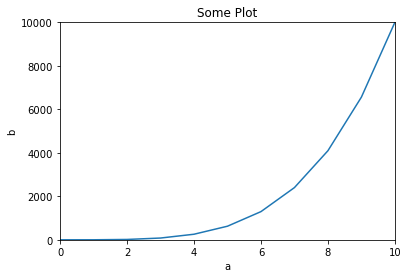

In [4]:
plt.plot(a,b)
plt.xlabel('a')
plt.ylabel('b')
plt.title('Some Plot')
plt.xlim(0,10)
plt.ylim(0,10000)
plt.savefig('images/new_plot.png')

plt.show()

<a id='2'></a>
### plt.figure() -- OOP Method

The more comprehensive Matplotlib OOP API makes use of a Figure object (acts as a background canvas). We then add axes to this Figure object and then plot on those axes. This allows for very robust controls over the entire plot.

```
fig = plt.figure(figsize=(10,10))
axes = fig.add_axes([0, 0, 1, 1]) 
axes.plot(x, y)
```
\[0,0,1,1\] are lower left corner coods, and width, height wrt to the canvas

In theory we could set axes side by side using plt.figure() calls, but typically it is easier to use plt.subplots() function calls for this.

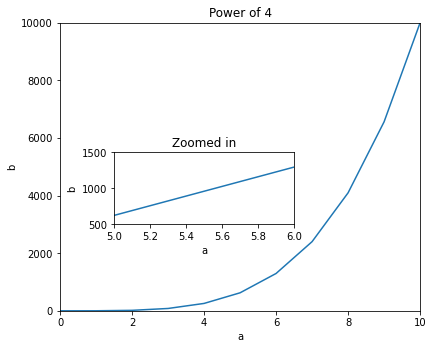

In [5]:
# main plot with a zoomed-in section 

fig = plt.figure(figsize=(5,4), dpi=None)

# large axes (as the main plot)
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(a,b)
ax1.set_xlim(0,10)
ax1.set_ylim(0,10000)
ax1.set_xlabel('a')
ax1.set_ylabel('b')
ax1.set_title('Power of 4')

# small axes (as an insert)
ax2 = fig.add_axes([0.15,0.3,0.5,0.25])
ax2.plot(a,b)
ax2.set_xlim(5,6)
ax2.set_ylim(500,1500)
ax2.set_xlabel('a')
ax2.set_ylabel('b')
ax2.set_title('Zoomed in')

plt.show()

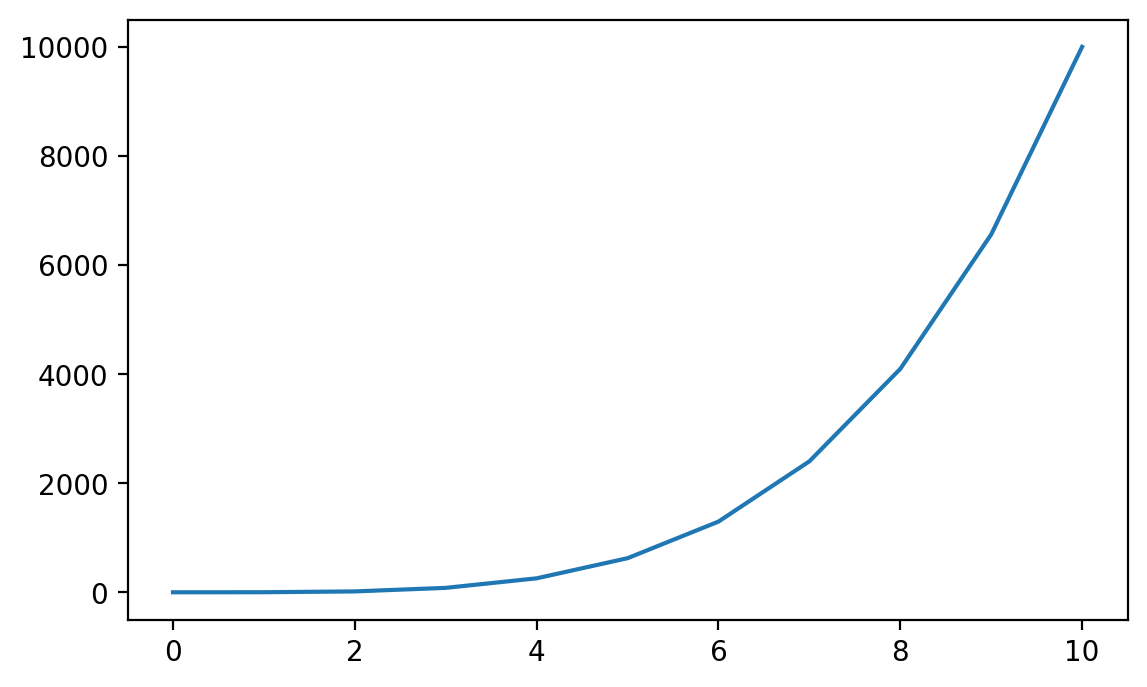

In [6]:
# figure parameters -- figsize, dpi, savefig, 
# bbox_inches (fit the noundaing box to include the x,y ticks)

fig = plt.figure(figsize=(5,3), dpi=200)

# large axes (as the main plot)
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(a,b)

plt.show()

fig.savefig('images/new_figure.png', bbox_inches='tight')

<a id='3'></a>
### plt.subplots() -- OOP Method

The plt.subplots() object will act as a more automatic axis manager. This makes it much easier to show multiple plots side by side.

The plt.subplots() command returns a tuple containing the Figure canvas and then a numpy array holding the axes objects.

plt.subplots() returns a tuple which by common convention we label (fig,axes):
- fig: This is the entire Figure canvas.
- axes: This is a numpy array holding each of the axes according to position in the overall canvas.


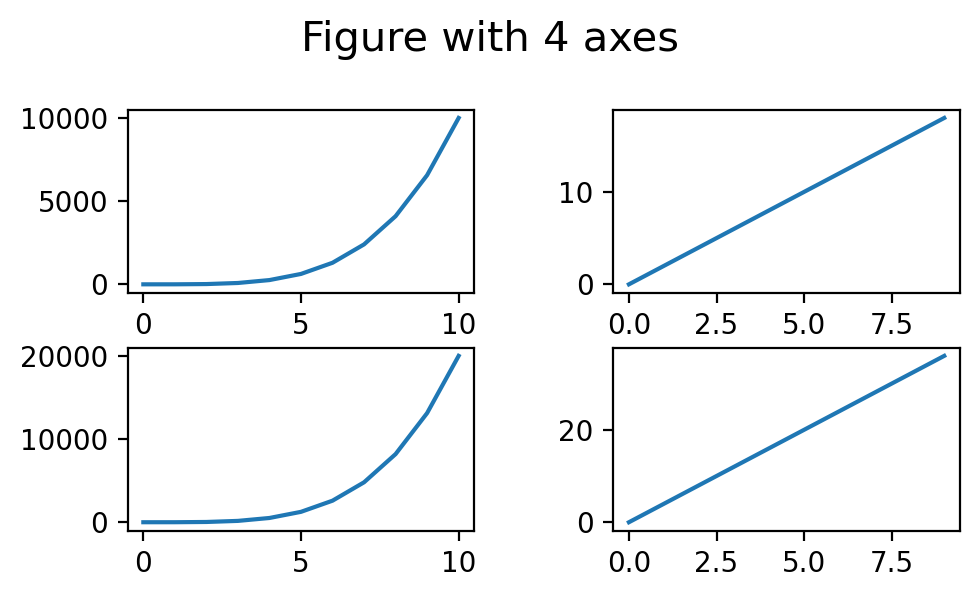

In [7]:
# a plot matrix (array)

fig, ax = plt.subplots(nrows=2, ncols=2, dpi=200, figsize=(5,3))

ax[0,0].plot(a,b)
ax[0,1].plot(x,y)
ax[1,0].plot(a,2*b)
ax[1,1].plot(x,2*y)

# figure level title (super title)
fig.suptitle('Figure with 4 axes', fontsize=15)

# avoid overlaping ticks -- 2 options

# 1. using tight_layout
plt.tight_layout()

# 2. using wspace (fraction of average width of the plots) and
# hspace (fraction of average hright of the plots)
fig.subplots_adjust(wspace=0.4, hspace=0.3)

fig.savefig('images/new_subplots.png', bbox_inches='tight')

plt.show()

<a id='4'></a>
### Styling

Matplotlib offers very robust styling functions that allow us to edit 
colors, 
[legends](https://matplotlib.org/2.0.2/users/legend_guide.html),
line widths, 
[markers](https://matplotlib.org/3.2.2/api/markers_api.html).

#### Custom linestyle dash

The dash sequence is a sequence of floats of even length describing
the length of dashes and spaces in points.

For example, (5, 2, 1, 2) describes a sequence of 5 point and 1 point dashes separated by 2 point spaces.

First, we see we can actually "grab" the line from the .plot() command.

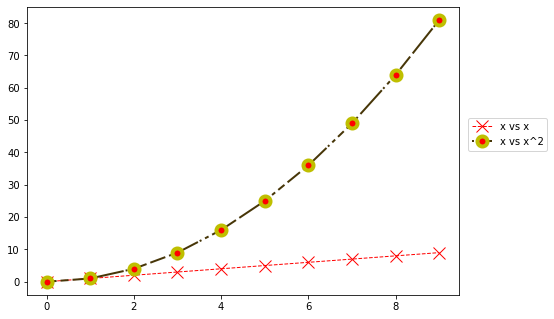

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(x,x,label='x vs x',c='r',lw=1,ls='--', marker='x', ms=12)

# RGB hex clr, line options, marker options,
lineList = ax.plot(x,x**2, label='x vs x^2', c='#473608',lw=2,
                  marker='o', ms='10', markerfacecolor='red',
                  markeredgecolor='y', markeredgewidth=4)

# custom linestyle using the list of lines lineList
# 1pt - 2ws - 2pt - 2ws - 4pt - 2ws - 8pt - 2ws - 16pt - 1ws 
lineList[0].set_dashes([1,2,2,2,4,2,8,2,16,1])

ax.legend(loc=(1.02, 0.5)) # location of legend wrt to canvas H/W

plt.show()

<a id='5'></a>
### Advanced Matplotlib Commands

In [9]:
x = np.arange(0,6)

#### Logarithmic scale

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

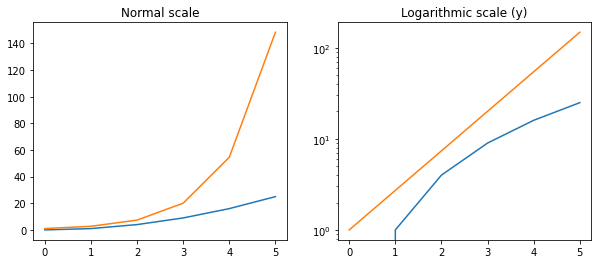

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x)) # passing a series of x,y data
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x)) # passing a series of x,y data
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

#### Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:

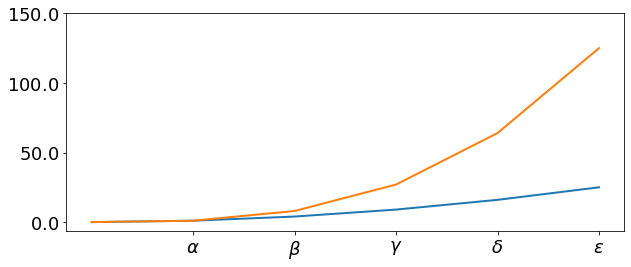

In [11]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', \
                    r'$\gamma$', r'$\delta$', r'$\epsilon$'], \
                   fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
# use LaTeX formatted labels
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18);

There are a number of more advanced methods for controlling major and minor tick placement in matplotlib figures, such as automatic placement according to different policies. See [ticker API](http://matplotlib.org/api/ticker_api.html) for details.

#### Scientific notation

With large numbers on axes, it is often better use scientific notation:

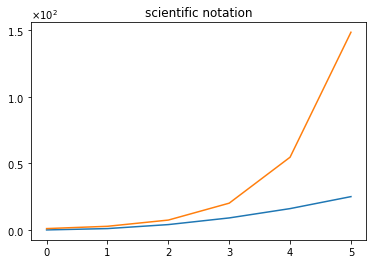

In [12]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

#### Axis number and axis label spacing

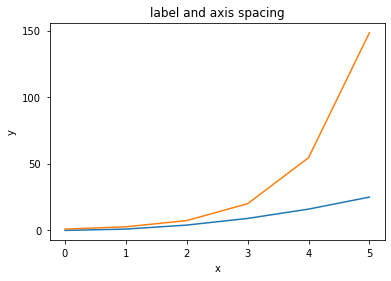

In [13]:
# distance between x and y axis and the numbers on the axes
import matplotlib
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

In [14]:
# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

#### Axis position adjustments

Unfortunately, when saving figures the labels are sometimes clipped, and it can be necessary to adjust the positions of axes a little bit. This can be done using `subplots_adjust`:

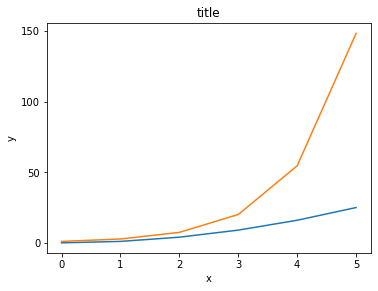

In [15]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

#### Axis grid

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

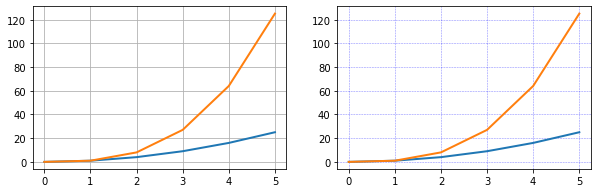

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, ls='--', lw=0.5)

#### Axis spines

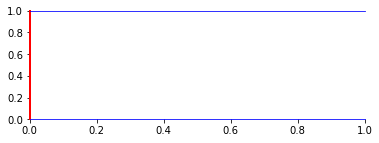

In [17]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

#### Twin axes

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

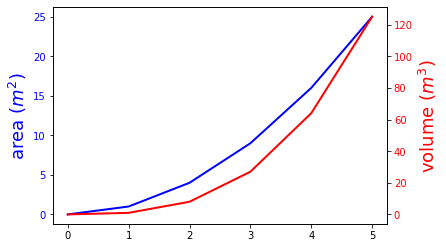

In [18]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

#### Set axes where x and y is zero

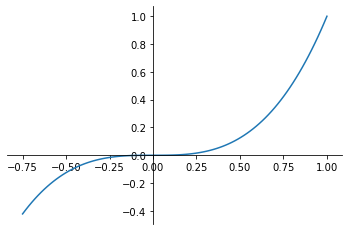

In [19]:
fig, ax = plt.subplots()

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
# set position of x spine to x=0
ax.spines['bottom'].set_position(('data',0))

ax.yaxis.set_ticks_position('left')
# set position of y spine to y=0
ax.spines['left'].set_position(('data',0))

<a id='6'></a>
### Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot [gallery](http://matplotlib.org/gallery.html) for a complete list of available plot types. Some of the more useful ones are show below:

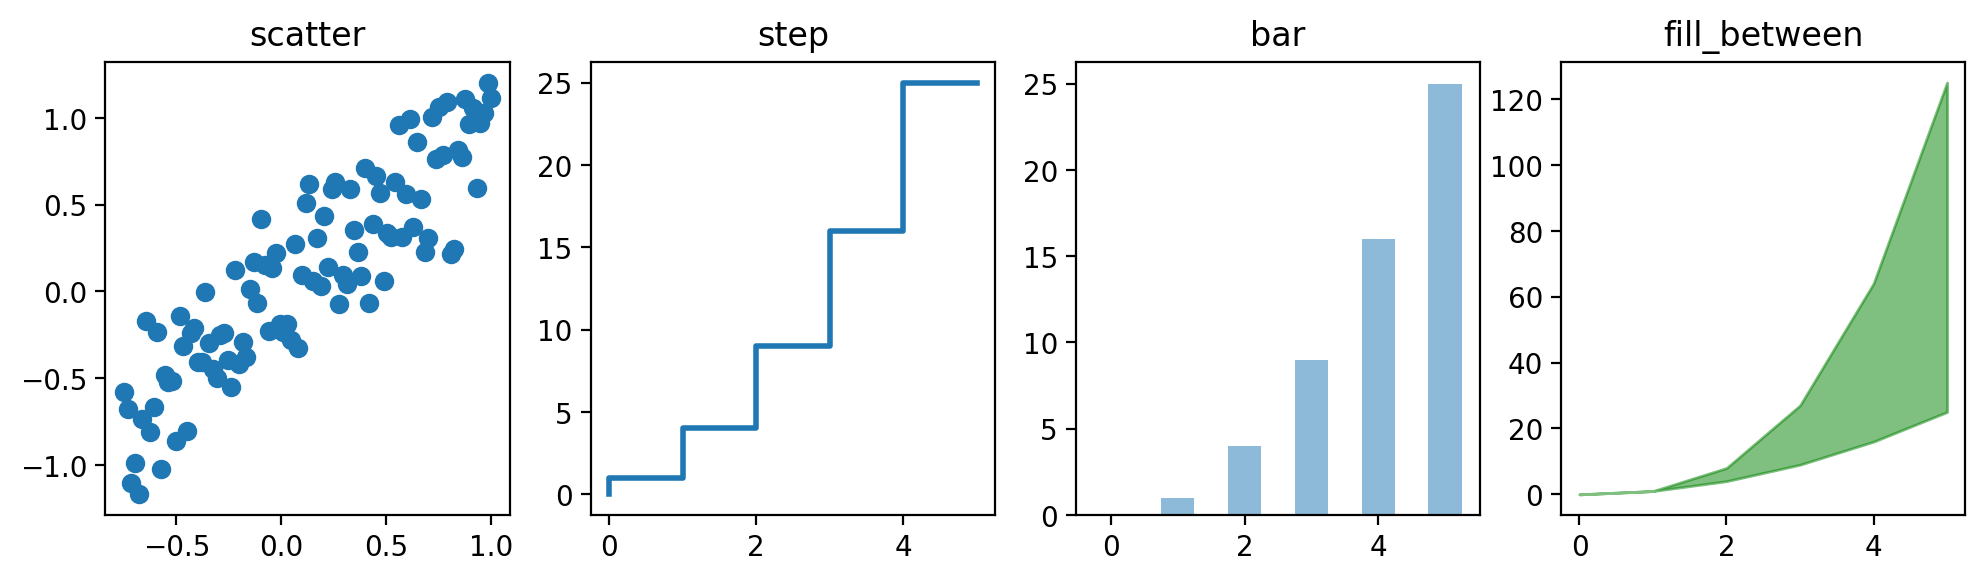

In [20]:
n = np.array([0,1,2,3,4,5])

fig, axes = plt.subplots(1, 4, figsize=(12,3), dpi=200)

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

#### Text annotation

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles.

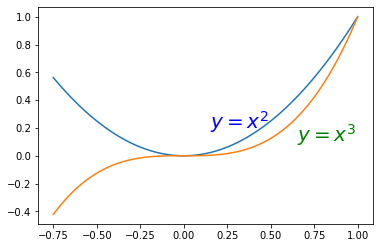

In [21]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

#### Figures with multiple subplots and insets

Axes can be added to a matplotlib Figure canvas manually using `fig.add_axes` or using a sub-figure layout manager such as `subplots`, `subplot2grid`, or `gridspec`:

###### subplots

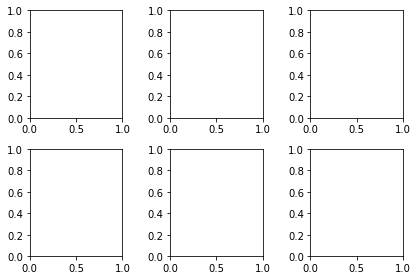

In [22]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

##### subplot2grid

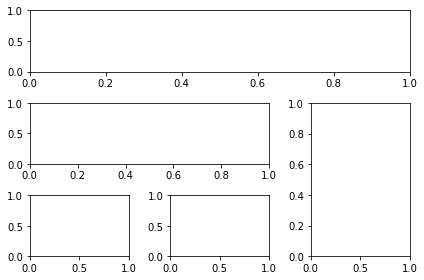

In [23]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

##### gridspec

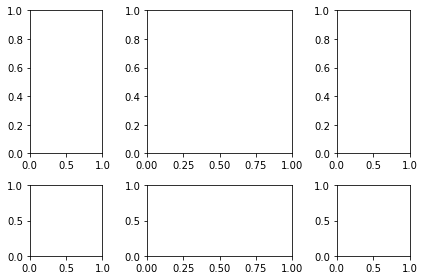

In [24]:
import matplotlib.gridspec as gridspec

fig = plt.figure()

gs = gridspec.GridSpec(2, 3, \
                       height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

##### add_axes

Manually adding axes with `add_axes` is useful for adding insets to figures.

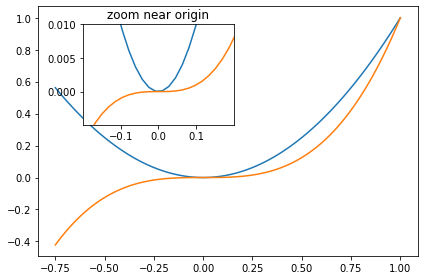

In [25]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

<a id='7'></a>
### Colormap and contour figures

Colormaps and contour figures are useful for plotting functions of two variables. In most of these functions we will use a colormap to encode one dimension of the data. There are a number of predefined colormaps. It is relatively straightforward to define custom colormaps. For a list of pre-defined colormaps, [see]( http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps)

In [26]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [27]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

/home/jigar/anaconda3/envs/dataScienceEnv/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


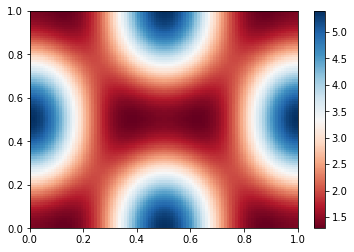

In [28]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### imshow

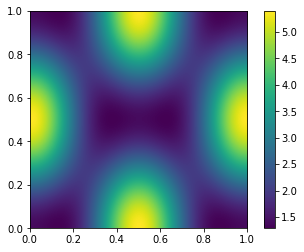

In [29]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap='viridis', vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

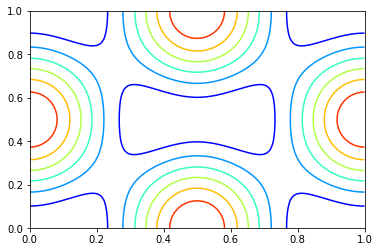

In [30]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap='jet', vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

<a id='8'></a>
### 3D figures

To use 3D graphics in matplotlib, we first need to create an instance of the `Axes3D` class. 3D axes can be added to a matplotlib figure canvas in exactly the same way as 2D axes; or, more conveniently, by passing a `projection='3d'` keyword argument to the `add_axes` or `add_subplot` methods.

In [31]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Surface plots

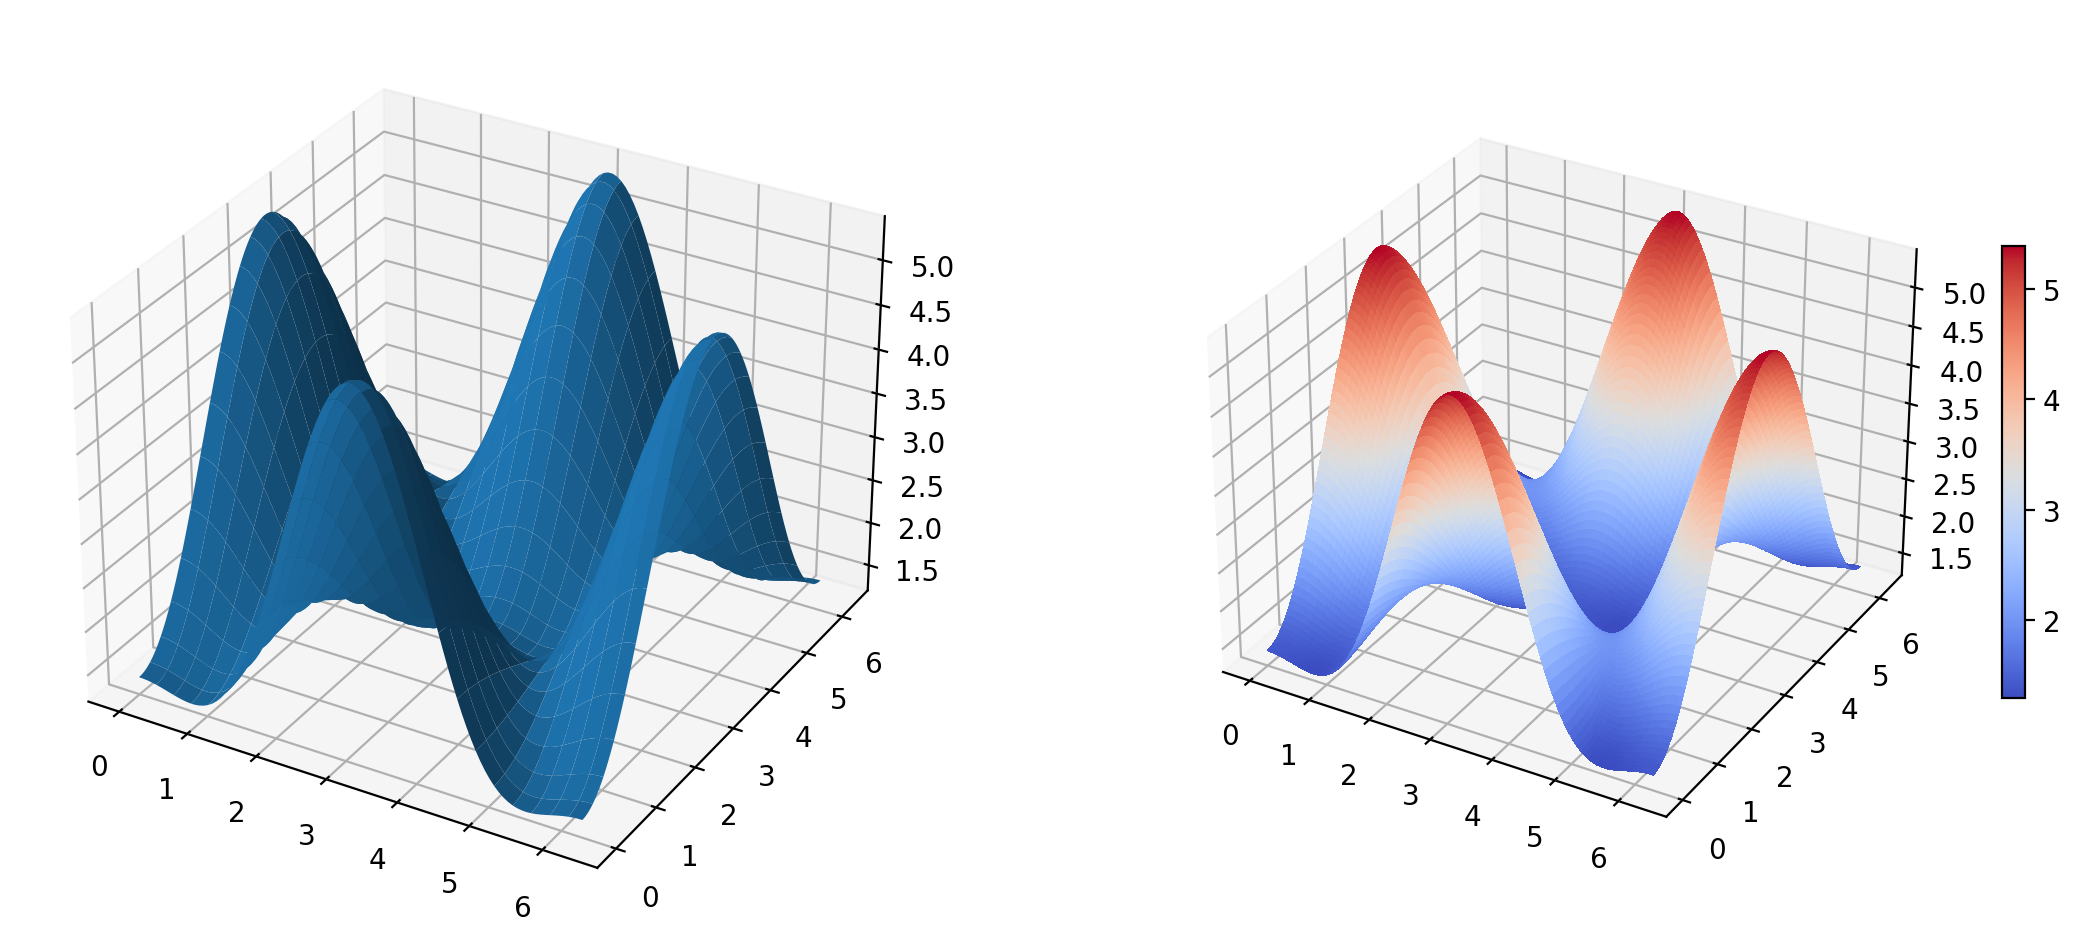

In [32]:
fig = plt.figure(figsize=(14,6), dpi=200)

# `ax` is a 3D-aware axis instance because of the projection='3d' 
# keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#### Wire-frame plot

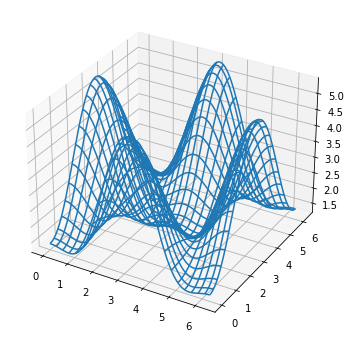

In [33]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#### Coutour plots with projections

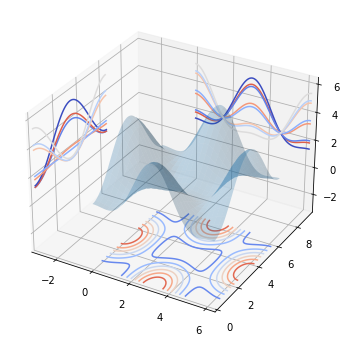

In [34]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

#ax.set_xlim3d(-np.pi, 2*np.pi);
#ax.set_ylim3d(0, 3*np.pi);
#ax.set_zlim3d(-np.pi, 2*np.pi);
ax.set(xlim3d=(-np.pi, 2*np.pi),
       ylim3d=(0, 3*np.pi),
       zlim3d=(-np.pi, 2*np.pi));

In [35]:
# Titanic dataset
import pandas as pd
df = pd.read_csv("http://bit.ly/tcsv19")

<a id='9'></a>
### Scatter plot analysis

<string>:6: UserWarning: Warning: converting a masked element to nan.
/home/jigar/anaconda3/envs/dataScienceEnv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/jigar/anaconda3/envs/dataScienceEnv/lib/python3.7/site-packages/matplotlib/ticker.py:652: UserWarning: Warning: converting a masked element to nan.
  s = self.format % xp


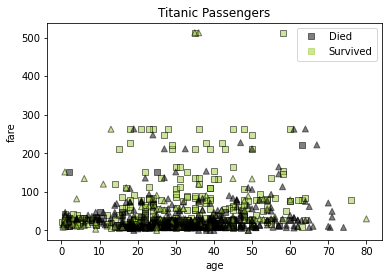

In [36]:
# Create a ListedColormap so we can set the colors manually
import matplotlib.colors as mcolors
cmap = mcolors.ListedColormap(['black', 'yellowgreen'])

fig, ax = plt.subplots()
    
# Label all the things using set
_ = ax.set(xlabel='age',ylabel='fare',title='Titanic Passengers')

if 0:
    # Simplify code using the data kwarg
    _ = ax.scatter('age', 'fare', data=df)

elif 0:
    # Let's encode data using color
    _ = ax.scatter('age', 'fare', c='survived', data=df)

elif 0:
    # Lets customize those colors
    _ = ax.scatter('age', 'fare', c='survived', cmap='tab10', 
                   data=df)

elif 0:
    # Use a ListedColormap defined above
    _ = ax.scatter('age', 'fare', c='survived', cmap=cmap, data=df)

elif 0:
    # Let's add a legend
    sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, data=df)
    _ =  ax.legend(*sc.legend_elements())

elif 0:
    # Lets add custom legend labels
    _ =  ax.legend(handles = sc.legend_elements()[0], 
                   labels=['Died', 'Survived'])

elif 0:
    # Let's clean up a bit because large dataset
    sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, 
                    alpha=.5, edgecolor='black', data=df)
    _ =  ax.legend(handles = sc.legend_elements()[0], 
                   labels=['Died', 'Survived'])
elif 0:
    # Encode even more information: Bubble Chart
    sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, 
                    alpha=.5, edgecolor='black', 
                    s = df['pclass']*25, data=df)
    _ = ax.set(xlabel = 'Age', ylabel = 'Fare')
    _ = ax.legend(handles = sc.legend_elements()[0], 
                  labels=['Died', 'Survived'])
else:
    # Visual Overload: markers
    sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, 
                    alpha=.5, edgecolor='black', marker='s',
                    label='Female', 
                    data=df[df['sex'].str.match('female')])
    sc2 = ax.scatter('age', 'fare', c='survived', cmap=cmap, 
                     alpha=.5, edgecolor='black', marker='^',
                     label='male', 
                     data=df[df['sex'].str.match('male')])
    _ =  ax.legend(handles = sc.legend_elements()[0], 
                   labels=['Died', 'Survived'])

<a id='10'></a>
### Histogram analysis

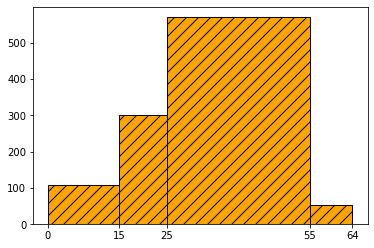

In [37]:
fig, ax = plt.subplots()

if 0:
    # Let's make Histograms
    (counts, edges, _) = ax.hist('age', bins='auto', data=df,
                                 edgecolor='k', facecolor='b',
                                 hatch='//')

elif 1:
    # Custom Bins to match our CDF
    (counts,edges,_) = ax.hist('age',bins=[0,15,25,55,64],data=df,
                               edgecolor='k', facecolor='orange',
                               hatch='//')
    _ = ax.set_xticks([0,15,25,55,64])
    
else:
    #Use groupby to simplify code
    # only consider rows where we know the age
    for label, gdf in df.groupby('sex'):
        ax.hist('age', bins=[0, 15,25, 55, 64], data=gdf, 
                label=label, alpha=.5)
    _ = ax.set_xticks([0, 15,25, 55, 64])
    _ = ax.legend()

<a id='11'></a>
### Pie chart analysis

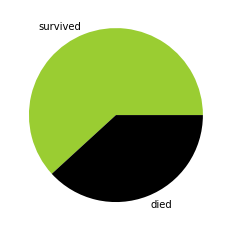

In [38]:
fig, ax =plt.subplots()
survived = df['survived'].value_counts()

if 1:
    # Let's make a Pie chart
    _ = ax.pie(x=survived.values, 
       labels=['survived', 'died'], 
               colors=['yellowgreen', 'black'])

<a id='12'></a>
### Bar chart analysis

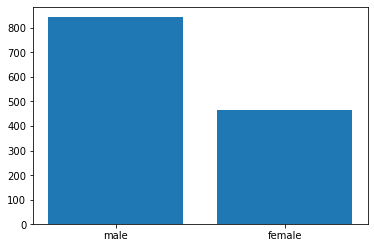

In [39]:
fig, ax =plt.subplots()
pclass = df['sex'].value_counts()

if 1:
    # Let's make a Bar charts
    _ = ax.bar(pclass.index, pclass.values)

<a id='13'></a>
### Images

type: <class 'numpy.ndarray'>, shape:(324, 368), dtype:float32


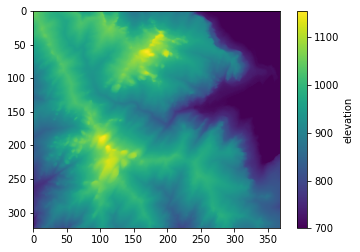

In [40]:
# loading an image
im = np.load('images/dem.npy')
print(f"type: {type(im)}, shape:{im.shape}, dtype:{im.dtype}")

if 0:
    # displaying an image
    plt.imshow(im)

elif 0:
    # include a color bar to go with the image
    fig, ax = plt.subplots()
    img = ax.imshow(im)
    cbar = fig.colorbar(img)
    cbar.set_label('elevation')
    
elif 1:
    # To set the lower limit, use the vmin parameter to imshow
    fig, ax = plt.subplots()
    img = ax.imshow(im, vmin=700)
    cbar = fig.colorbar(img)
    cbar.set_label('elevation')
    
elif 0:
    # e.g. magma colormap
    fig, ax = plt.subplots()
    img = ax.imshow(im, cmap='magma')
    cbar = fig.colorbar(img)
    cbar.set_label('elevation')
    
elif 0:
    # Follow the lines (note the use of sharex, sharey)
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
    ax1.contour(im, cmap='magma')
    ax1.set_aspect('equal')
    ax2.imshow(im, cmap='magma', origin='lower')      
    # put (0, 0) on the lower left to match contour
    
elif 0:
    # Change the normalization (The default normalization is
    # linear, however there are cases where you need a more 
    # exotic normalization)
    from matplotlib.colors import LogNorm

    # take the 2D fft of our test image and re-order to put 0 
    # frequency in the center
    spike = np.abs(np.fft.fftshift(np.fft.fft2(im)))

    fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(10, 5))

    lin_im = ax1.imshow(spike)
    _ = fig.colorbar(lin_im, ax=ax1)
    _ = ax1.set_title('linear color scale')

    log_im = ax2.imshow(spike, norm=LogNorm())
    _ = fig.colorbar(log_im, ax=ax2)
    _ = ax2.set_title('log color scale')
    
else:
    # We can make use of a BoundryNorm to quantize the data 
    # (in in possibly non-uniform bins)
    import matplotlib.colors as mcolors
    import matplotlib.cm as mcm

    cmap = mcm.tab20b
    norm = mcolors.BoundaryNorm([1, 3, 4, 5, 7, 9, 12, 15, 20], cmap.N)

    data = np.arange(20).reshape((1, 20))

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

    top = ax1.imshow(data, cmap=cmap, aspect='auto')
    fig.colorbar(top, ax=ax1)
    bottom = ax2.imshow(data, norm=norm, cmap=cmap, aspect='auto')
    fig.colorbar(bottom, ax=ax2)

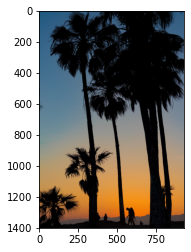

In [41]:
# .jpg, .png --> numpy array
import matplotlib.image as mpimg

image_as_array = mpimg.imread('data/palm_trees.jpg')
plt.imshow(image_as_array);

adjusting notebook layout